In [1]:
import pandas as pd
import re
import os
import matplotlib as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('new_cleaned_data.csv')
df.tail()

,Address,City,Price,Bedroom,Bathroom,Floors,Parking,Face,Year,Area,Road Width,Road Type,Build Area,Amenities,Pricepersqft
1682,Other,Others,59000000,5,2,2.0,7,South,2074.0,18139.250,12.0,None,18139.250,13,3252.615185
1683,Other,Lalitpur,6500000,4,3,3.0,5,North,2074.0,10267.500,30.0,None,10267.500,13,633.065498
1684,Sitapaila,Kathmandu,12000000,4,2,2.0,1,North East,2074.0,855.625,13.0,None,855.625,4,14024.835646
1685,Budhanilkantha,Kathmandu,27000000,5,3,2.0,1,East,2071.0,2738.000,12.0,None,2738.000,4,9861.212564
1686,Baluwatar,Kathmandu,72500000,5,2,3.0,5,East,2074.0,4449.250,12.0,None,4449.250,5,16294.881160


In [3]:
df = df.drop(['Pricepersqft'],axis='columns')

In [4]:
df.shape

(1687, 14)

<AxesSubplot:xlabel='Price'>

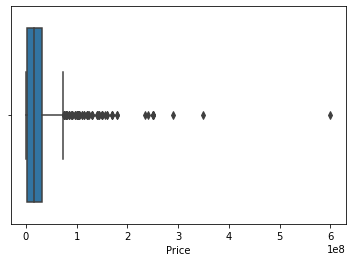

In [5]:
import seaborn as sns

# Create boxplot for Price column
sns.boxplot(x=df['Price'])


In [6]:
df.City.unique()

array(['Kathmandu', 'Pokhara', 'Bhaktapur', 'Lalitpur', 'Chitwan',
       'Others', 'Dharan', 'Makwanpur', 'Nawalparasi'], dtype=object)

<AxesSubplot:xlabel='Price', ylabel='Address'>

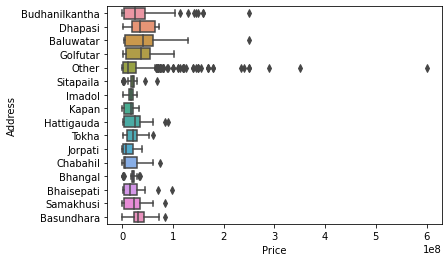

In [7]:
sns.boxplot(y="Address", x="Price", data=df)

In [8]:
df_kathmandu = df[df['City'] == 'Kathmandu']
df_pokhara = df[df['City'] == 'Pokhara']
df_bhaktapur = df[df['City'] == 'Bhaktapur']
df_lalitpur = df[df['City'] == 'Lalitpur']
df_chitwan = df[df['City'] == 'Chitwan']
df_dharan = df[df['City'] == 'Dharan']
df_makwanpur = df[df['City'] == 'Makwanpur']
df_nawalparasi = df[df['City'] == 'Nawalparasi']
df_others = df[df['City'] == 'Others']
df_kathmandu.head()


,Address,City,Price,Bedroom,Bathroom,Floors,Parking,Face,Year,Area,Road Width,Road Type,Build Area,Amenities
0,Budhanilkantha,Kathmandu,90000000,6,3,2.0,10,West,2073.0,5476.00,20.0,Blacktopped,98568.00,16
1,Budhanilkantha,Kathmandu,80000000,5,3,2.0,9,East,2073.0,7187.25,20.0,Blacktopped,7187.25,15
2,Dhapasi,Kathmandu,70000000,5,3,2.0,12,East,2071.0,5818.25,20.0,Blacktopped,55102.25,16
3,Baluwatar,Kathmandu,130000000,6,4,3.0,9,West,2017.0,7067.50,20.0,Blacktopped,7067.50,16
4,Golfutar,Kathmandu,100000000,6,3,2.0,10,East,2070.0,13792.75,20.0,Blacktopped,13792.75,16


<AxesSubplot:xlabel='Price'>

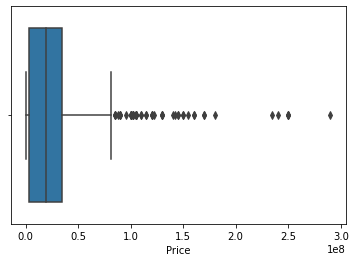

In [9]:
sns.boxplot(x=df_kathmandu['Price'])

In [10]:
df_kathmandu = df_kathmandu[(df_kathmandu.Price< 125000000)]
df_kathmandu.shape

(1176, 14)

<AxesSubplot:xlabel='Price'>

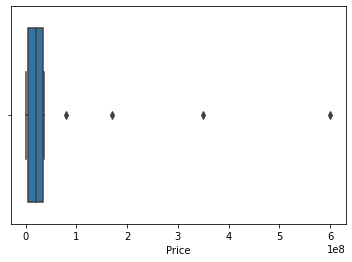

In [11]:
sns.boxplot(x=df_pokhara['Price'])

In [12]:
df_pokhara = df_pokhara[(df_pokhara.Price< 100000000)]
df_pokhara.shape

(23, 14)

<AxesSubplot:xlabel='Price'>

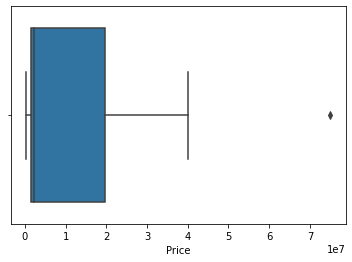

In [13]:
sns.boxplot(x=df_bhaktapur['Price'])

In [14]:
df_bhaktapur = df_bhaktapur[(df_bhaktapur.Price< 50000000)]
df_bhaktapur.shape

(67, 14)

<AxesSubplot:xlabel='Price'>

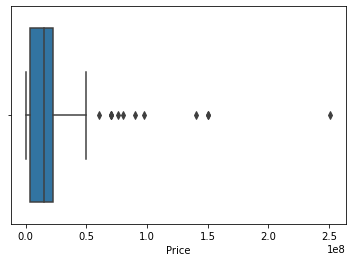

In [15]:
sns.boxplot(x=df_lalitpur['Price'])

In [16]:
df_lalitpur = df_lalitpur[(df_lalitpur.Price< 50000000)]
df_lalitpur.shape

(273, 14)

<AxesSubplot:xlabel='Price'>

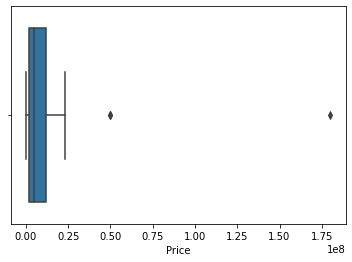

In [17]:
sns.boxplot(x=df_chitwan['Price'])

In [18]:
df_chitwan = df_chitwan[(df_chitwan.Price< 26000000)]
df_chitwan.shape

(20, 14)

<AxesSubplot:xlabel='Price'>

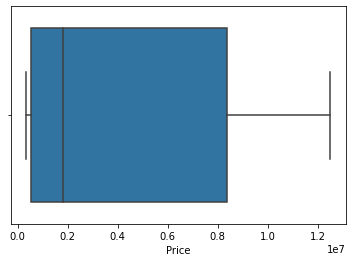

In [19]:
sns.boxplot(x=df_dharan['Price'])

In [20]:
# df_dharan = df_dharan[(df_dharan.Price< 100000000)]
df_dharan.shape

(10, 14)

<AxesSubplot:xlabel='Price'>

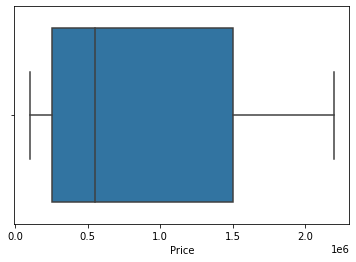

In [21]:
sns.boxplot(x=df_nawalparasi['Price'])

In [22]:
# df_nawalparasi = df_nawalparasi[(df_nawalparasi.Price< 100000000)]
df_nawalparasi.shape

(11, 14)

<AxesSubplot:xlabel='Price'>

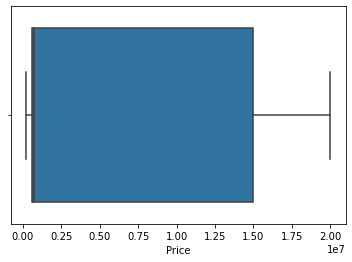

In [23]:
sns.boxplot(x=df_makwanpur['Price'])

In [24]:
# df_makwanpur = df_makwanpur[(df_makwanpur.Price< 100000000)]
df_makwanpur.shape

(9, 14)

<AxesSubplot:xlabel='Price'>

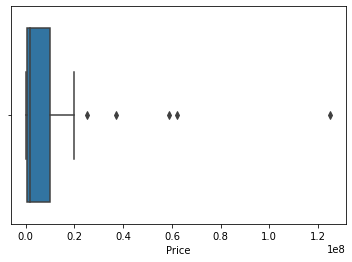

In [25]:
sns.boxplot(x=df_others['Price'])

In [26]:
df_others = df_others[(df_others.Price< 30000000)]
df_others.shape

(54, 14)

In [27]:
# Merge the new DataFrames into a single DataFrame
merged_df = pd.concat([df_kathmandu, df_pokhara, df_bhaktapur, df_lalitpur, df_chitwan, df_dharan, df_makwanpur, df_nawalparasi, df_others])

# Reset the index of the merged DataFrame
merged_df = merged_df.reset_index(drop=True)
merged_df.shape

(1643, 14)

In [28]:
merged_df

,Address,City,Price,Bedroom,Bathroom,Floors,Parking,Face,Year,Area,Road Width,Road Type,Build Area,Amenities
0,Budhanilkantha,Kathmandu,90000000,6,3,2.0,10,West,2073.0,5476.000,20.0,Blacktopped,98568.000,16
1,Budhanilkantha,Kathmandu,80000000,5,3,2.0,9,East,2073.0,7187.250,20.0,Blacktopped,7187.250,15
2,Dhapasi,Kathmandu,70000000,5,3,2.0,12,East,2071.0,5818.250,20.0,Blacktopped,55102.250,16
3,Golfutar,Kathmandu,100000000,6,3,2.0,10,East,2070.0,13792.750,20.0,Blacktopped,13792.750,16
4,Other,Kathmandu,100000000,5,6,3.0,9,East,2074.0,15043.000,13.0,Blacktopped,15043.000,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,Other,Others,6400000,3,1,1.0,0,North,2074.0,133.350,15.0,Soil Stabilized,133.350,4
1639,Other,Others,2200000,0,0,3.0,0,North,2074.0,23137.000,20.0,Gravelled,23137.000,0
1640,Other,Others,25000000,10,4,3.0,0,East,2074.0,155.575,20.0,Gravelled,155.575,6
1641,Other,Others,10000000,0,0,3.0,0,East,2074.0,21305.250,25.0,None,21305.250,0


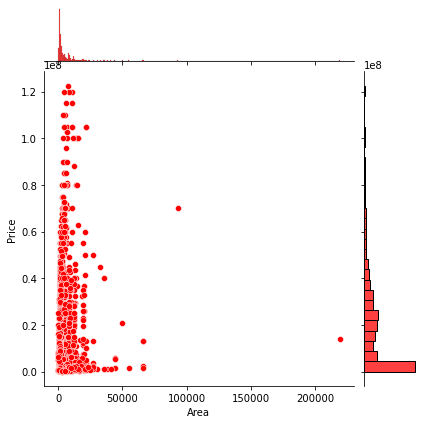

In [29]:
sns.jointplot(x=merged_df["Area"], y=merged_df["Price"],color='red', kind='scatter')

In [30]:
merged_df = merged_df[(merged_df.Area < 50000) & (merged_df.Price < 100000000)]
# merged_df = merged_df[(merged_df.Area < 100000) & (merged_df.Price < 200000000)]
merged_df.shape

(1612, 14)

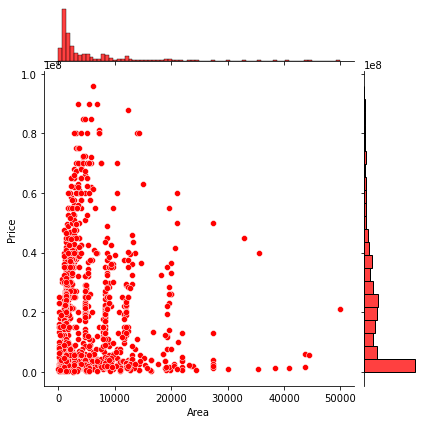

In [31]:
sns.jointplot(x=merged_df["Area"], y=merged_df["Price"],color='red', kind='scatter')

<AxesSubplot:xlabel='Bedroom'>

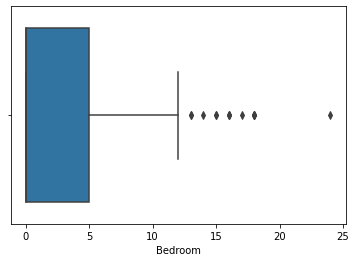

In [32]:
sns.boxplot(x=merged_df['Bedroom'])

<AxesSubplot:xlabel='Bathroom'>

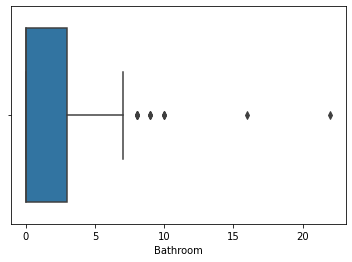

In [33]:
sns.boxplot(x=merged_df['Bathroom'])

<AxesSubplot:xlabel='Floors'>

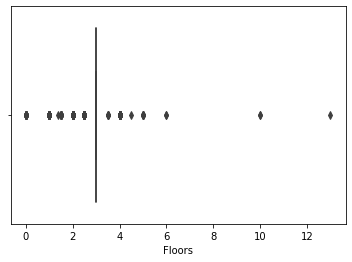

In [34]:
sns.boxplot(x=merged_df['Floors'])

<AxesSubplot:xlabel='Parking'>

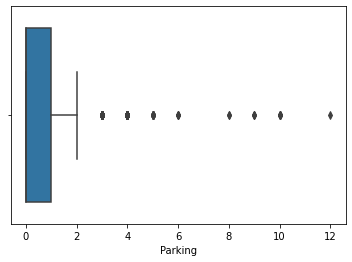

In [35]:
sns.boxplot(x=merged_df['Parking'])

<AxesSubplot:xlabel='Amenities'>

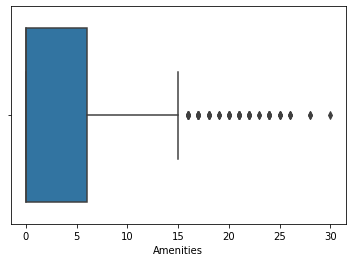

In [36]:
sns.boxplot(x=merged_df['Amenities'])

<AxesSubplot:xlabel='Floors'>

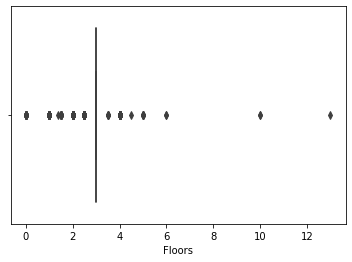

In [37]:
sns.boxplot(x=merged_df['Floors'])

<AxesSubplot:xlabel='Year'>

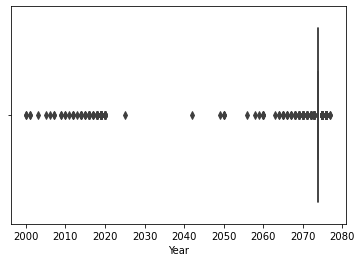

In [38]:
sns.boxplot(x=merged_df['Year'])

<AxesSubplot:xlabel='Build Area'>

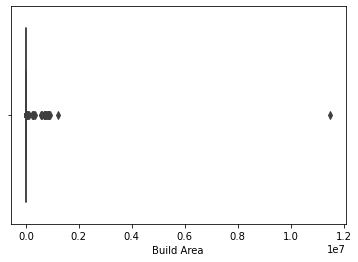

In [39]:
sns.boxplot(x=merged_df['Build Area'])

In [40]:
merged_df = merged_df[(merged_df.Bedroom < 20) & (merged_df.Bathroom < 10)]
# merged_df = merged_df[(merged_df['Build Area'] < 2000000)]
merged_df.columns

Index(['Address', 'City', 'Price', 'Bedroom', 'Bathroom', 'Floors', 'Parking',
       'Face', 'Year', 'Area', 'Road Width', 'Road Type', 'Build Area',
       'Amenities'],
      dtype='object')

In [41]:
# khmkv1

In [42]:
merged_df

,Address,City,Price,Bedroom,Bathroom,Floors,Parking,Face,Year,Area,Road Width,Road Type,Build Area,Amenities
0,Budhanilkantha,Kathmandu,90000000,6,3,2.0,10,West,2073.0,5476.000,20.0,Blacktopped,98568.000,16
1,Budhanilkantha,Kathmandu,80000000,5,3,2.0,9,East,2073.0,7187.250,20.0,Blacktopped,7187.250,15
2,Dhapasi,Kathmandu,70000000,5,3,2.0,12,East,2071.0,5818.250,20.0,Blacktopped,55102.250,16
5,Budhanilkantha,Kathmandu,50000000,5,4,2.0,9,East,2073.0,20963.000,20.0,Blacktopped,20963.000,16
7,Other,Kathmandu,32500000,6,4,2.5,1,South East,2065.0,1369.000,12.0,Concrete,819346.500,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,Other,Others,6400000,3,1,1.0,0,North,2074.0,133.350,15.0,Soil Stabilized,133.350,4
1639,Other,Others,2200000,0,0,3.0,0,North,2074.0,23137.000,20.0,Gravelled,23137.000,0
1640,Other,Others,25000000,10,4,3.0,0,East,2074.0,155.575,20.0,Gravelled,155.575,6
1641,Other,Others,10000000,0,0,3.0,0,East,2074.0,21305.250,25.0,None,21305.250,0


In [43]:
# merged_df.to_csv('new_cat_processed_data.csv', index=False)

In [44]:
one_hot_city = pd.get_dummies(merged_df['City'], prefix='City')
one_hot_address = pd.get_dummies(merged_df['Address'], prefix='Address')
one_hot_face = pd.get_dummies(merged_df['Face'], prefix='Face')
one_hot_road_type = pd.get_dummies(merged_df['Road Type'], prefix='Road Type')

# Add the new columns to the original dataframe
# merged_df = pd.concat([merged_df, one_hot_city, one_hot_address, one_hot_face], axis=1)
merged_df = pd.concat([merged_df, one_hot_city, one_hot_address, one_hot_face, one_hot_road_type], axis=1)
# df = pd.concat([df, one_hot_city, one_hot_face, one_hot_road_type], axis=1)

# Remove the original columns
merged_df.drop(['City', 'Address', 'Face', 'Road Type'], axis=1, inplace=True)

In [45]:
merged_df

,Price,Bedroom,Bathroom,Floors,Parking,Year,Area,Road Width,Build Area,Amenities,...,Face_South East,Face_South West,Face_West,Road Type_ Alley,Road Type_ Blacktopped,Road Type_ Concrete,Road Type_ Gravelled,Road Type_ Paved,Road Type_ Soil Stabilized,Road Type_None
0,90000000,6,3,2.0,10,2073.0,5476.000,20.0,98568.000,16,...,0,0,1,0,1,0,0,0,0,0
1,80000000,5,3,2.0,9,2073.0,7187.250,20.0,7187.250,15,...,0,0,0,0,1,0,0,0,0,0
2,70000000,5,3,2.0,12,2071.0,5818.250,20.0,55102.250,16,...,0,0,0,0,1,0,0,0,0,0
5,50000000,5,4,2.0,9,2073.0,20963.000,20.0,20963.000,16,...,0,0,0,0,1,0,0,0,0,0
7,32500000,6,4,2.5,1,2065.0,1369.000,12.0,819346.500,13,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,6400000,3,1,1.0,0,2074.0,133.350,15.0,133.350,4,...,0,0,0,0,0,0,0,0,1,0
1639,2200000,0,0,3.0,0,2074.0,23137.000,20.0,23137.000,0,...,0,0,0,0,0,0,1,0,0,0
1640,25000000,10,4,3.0,0,2074.0,155.575,20.0,155.575,6,...,0,0,0,0,0,0,1,0,0,0
1641,10000000,0,0,3.0,0,2074.0,21305.250,25.0,21305.250,0,...,0,0,0,0,0,0,0,0,0,1


In [46]:
# merged_df.to_csv('new_processed_data.csv', index=False)

In [47]:
X = merged_df.drop(['Price'],axis='columns')
# X = merged_df.drop(['Price','Pricepersqft','Road Width'],axis='columns')
X.head(3)

,Bedroom,Bathroom,Floors,Parking,Year,Area,Road Width,Build Area,Amenities,City_Bhaktapur,...,Face_South East,Face_South West,Face_West,Road Type_ Alley,Road Type_ Blacktopped,Road Type_ Concrete,Road Type_ Gravelled,Road Type_ Paved,Road Type_ Soil Stabilized,Road Type_None
0,6,3,2.0,10,2073.0,5476.00,20.0,98568.00,16,0,...,0,0,1,0,1,0,0,0,0,0
1,5,3,2.0,9,2073.0,7187.25,20.0,7187.25,15,0,...,0,0,0,0,1,0,0,0,0,0
2,5,3,2.0,12,2071.0,5818.25,20.0,55102.25,16,0,...,0,0,0,0,1,0,0,0,0,0


In [48]:
y = merged_df.Price
y.head(3)

0    90000000
1    80000000
2    70000000
Name: Price, dtype: int64

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)
from sklearn.preprocessing import StandardScaler as SS
sc = SS()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [50]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [51]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [52]:
# # Use the random grid to search for best hyperparameters
# # First create the base model to tune
# rf = RandomForestRegressor()
# # Random search of parameters, using 3 fold cross validation, 
# # search across 100 different combinations, and use all available cores
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# # Fit the random search model
# rf_random.fit(X,y)

In [53]:
# best_params = rf_random.best_params_
# print("Best hyperparameters:", best_params)

In [54]:
from sklearn.ensemble import RandomForestRegressor
# rf = RandomForestRegressor(bootstrap = True, max_depth= 10, max_features = 'auto',
#  min_samples_leaf = 4,
#  min_samples_split = 5,
#  n_estimators = 200)
rf = RandomForestRegressor(bootstrap = False, max_depth= None, max_features = 'sqrt',
 min_samples_leaf = 2,
 min_samples_split = 5,
 n_estimators = 1400)
# rf = RandomForestRegressor(bootstrap = True, max_depth= 10, max_features = 'auto',
#  min_samples_leaf = 1,
#  min_samples_split = 5,
#  n_estimators = 1600)

rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.8036291333128064

In [65]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from scipy.stats import randint, uniform

# Define the parameter distribution for Random Search
param_dist = {'learning_rate': uniform(0.01, 0.1),
              'n_estimators': randint(100, 1000),
              'max_depth': randint(3, 7),
              'min_samples_split': randint(2, 6),
              'min_samples_leaf': randint(1, 4),
              'max_features': ['auto', 'sqrt', 'log2']}

# Create an instance of Gradient Boosting Regressor
gb = GradientBoostingRegressor()

# Create an instance of RandomizedSearchCV
random_search = RandomizedSearchCV(gb, param_distributions=param_dist, cv=5, n_jobs=-1, scoring='neg_mean_squared_error', n_iter=10, random_state=42)

# Fit the Random Search model to the data
random_search.fit(X_train, y_train)

# Get the best parameters and best score
print("Best parameters: ", random_search.best_params_)
print("Best score: ", -random_search.best_score_)

# Make predictions on test data using the best estimator
y_pred = random_search.best_estimator_.predict(X_test)

# Calculate mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)

Best parameters:  {'learning_rate': 0.039122914019804195, 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 575}
Best score:  101902227026057.84
MSE:  58734615829794.53


In [66]:
# Fit the Gradient Boosting Regressor with the best parameters
best_gb = GradientBoostingRegressor(learning_rate=0.039122914019804195,
                                max_depth=5,
                                max_features='log2',
                                min_samples_leaf=2,
                                min_samples_split=5,
                                n_estimators=575)
best_gb.fit(X_train, y_train)
print(best_gb.score(X_test,y_test))
# Make predictions on the test set
y_pred = best_gb.predict(X_test)

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: ", rmse)

0.7907877755768937
RMSE:  7849666.835386362


In [56]:
feature_importance = rf.feature_importances_

In [57]:
feature_names = X.columns
print(feature_names)

Index(['Bedroom', 'Bathroom', 'Floors', 'Parking', 'Year', 'Area',
       'Road Width', 'Build Area', 'Amenities', 'City_Bhaktapur',
       'City_Chitwan', 'City_Dharan', 'City_Kathmandu', 'City_Lalitpur',
       'City_Makwanpur', 'City_Nawalparasi', 'City_Others', 'City_Pokhara',
       'Address_Baluwatar', 'Address_Basundhara', 'Address_Bhaisepati',
       'Address_Bhangal', 'Address_Budhanilkantha', 'Address_Chabahil',
       'Address_Dhapasi', 'Address_Golfutar', 'Address_Hattigauda',
       'Address_Imadol', 'Address_Jorpati', 'Address_Kapan', 'Address_Other',
       'Address_Samakhusi', 'Address_Sitapaila', 'Address_Tokha', 'Face_East',
       'Face_North', 'Face_North East', 'Face_North West', 'Face_South',
       'Face_South East', 'Face_South West', 'Face_West', 'Road Type_ Alley',
       'Road Type_ Blacktopped', 'Road Type_ Concrete', 'Road Type_ Gravelled',
       'Road Type_ Paved', 'Road Type_ Soil Stabilized', 'Road Type_None'],
      dtype='object')


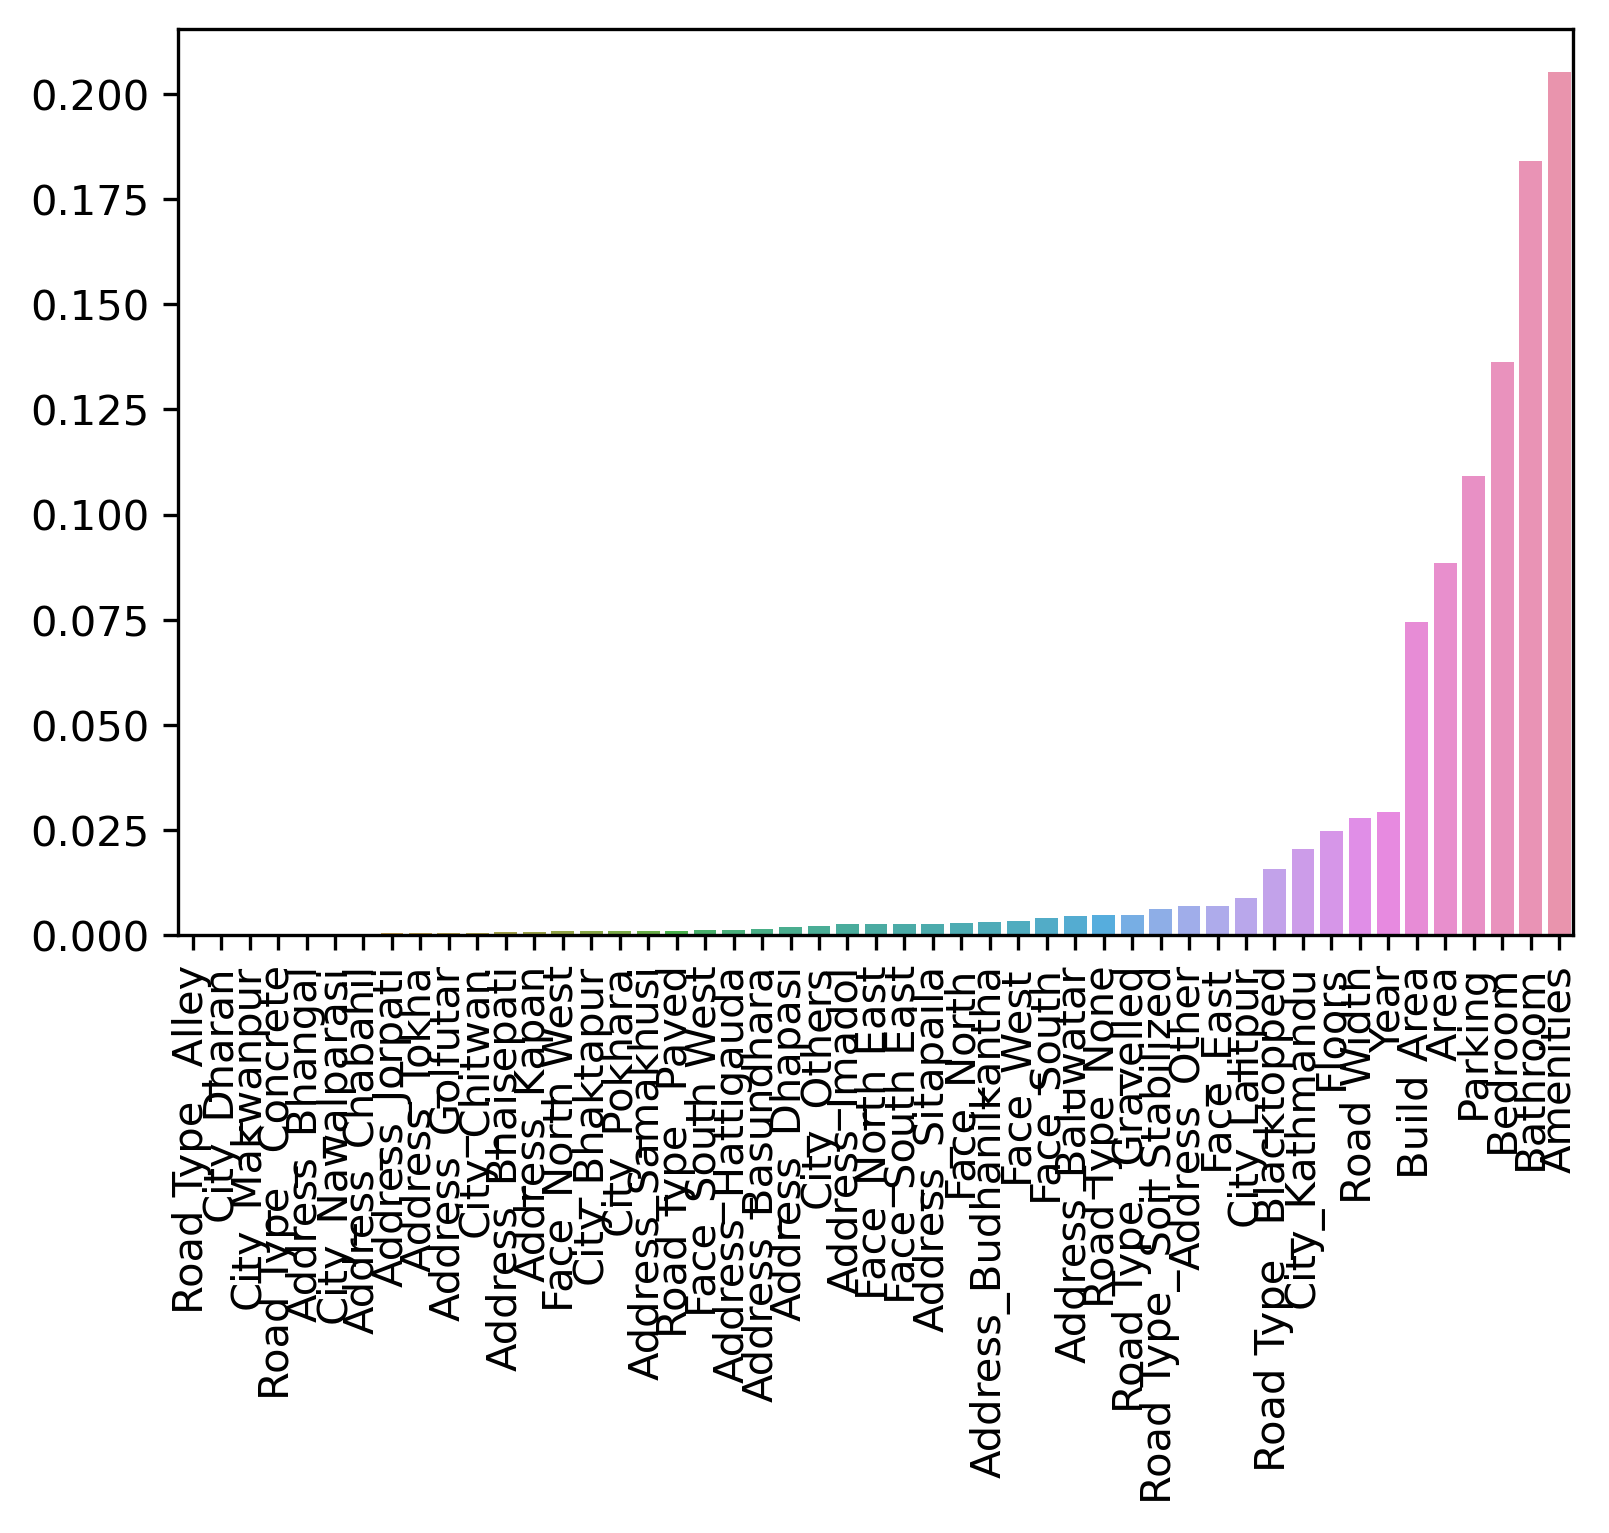

In [58]:
import seaborn as sns
# For plotting
plt.rcParams['figure.dpi'] = 300
column_names = ['Bedroom', 'Bathroom', 'Floors', 'Parking', 'Year', 'Area',
       'Road Width', 'Build Area', 'Amenities', 'City_Bhaktapur',
       'City_Chitwan', 'City_Dharan', 'City_Kathmandu', 'City_Lalitpur',
       'City_Makwanpur', 'City_Nawalparasi', 'City_Others', 'City_Pokhara',
       'Address_Baluwatar', 'Address_Basundhara', 'Address_Bhaisepati',
       'Address_Bhangal', 'Address_Budhanilkantha', 'Address_Chabahil',
       'Address_Dhapasi', 'Address_Golfutar', 'Address_Hattigauda',
       'Address_Imadol', 'Address_Jorpati', 'Address_Kapan', 'Address_Other',
       'Address_Samakhusi', 'Address_Sitapaila', 'Address_Tokha', 'Face_East',
       'Face_North', 'Face_North East', 'Face_North West', 'Face_South',
       'Face_South East', 'Face_South West', 'Face_West', 'Road Type_ Alley',
       'Road Type_ Blacktopped', 'Road Type_ Concrete', 'Road Type_ Gravelled',
       'Road Type_ Paved', 'Road Type_ Soil Stabilized', 'Road Type_None']
zipped = zip(feature_importance, column_names)
sorted_pairs = sorted(zipped)

listl = [i for i,j in sorted_pairs]
list2 = [j for i,j in sorted_pairs]

g = sns.barplot(x=list2, y=listl)
txt = g.set_xticklabels(g.get_xticklabels(), rotation = 90)

In [59]:
for feature, importance in zip(feature_names, feature_importance):
    print("{}: {}".format(feature, importance))

Bedroom: 0.13624699872406137
Bathroom: 0.18396177922995602
Floors: 0.02486437650251445
Parking: 0.10919218312566911
Year: 0.029177688824541855
Area: 0.08837786650068115
Road Width: 0.027882117728025818
Build Area: 0.0743831815501032
Amenities: 0.20518864541891246
City_Bhaktapur: 0.0009678968018363461
City_Chitwan: 0.0005126731743558722
City_Dharan: 1.3028115144325655e-05
City_Kathmandu: 0.020450660860176047
City_Lalitpur: 0.008817286129652793
City_Makwanpur: 3.08638454518239e-05
City_Nawalparasi: 0.00030281524875881894
City_Others: 0.0022148604066659777
City_Pokhara: 0.0009761516550940811
Address_Baluwatar: 0.004623097344867645
Address_Basundhara: 0.0014871269231496343
Address_Bhaisepati: 0.0006267249086438903
Address_Bhangal: 0.0002626375888004234
Address_Budhanilkantha: 0.003216420293588837
Address_Chabahil: 0.0003228827301999642
Address_Dhapasi: 0.0020371339074526603
Address_Golfutar: 0.0004886736492079706
Address_Hattigauda: 0.0011326792312603634
Address_Imadol: 0.00259482487979366